# Chapter 5. Investment and Trading Strategies

In [25]:
#!pip install ta-lib-bin
#!pip install mplfinance

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
import yfinance as yf
import talib
import mplfinance as mpf

## Fundamental Analysis Example

### Fundamental analysis (code preparation)

In [28]:
# Fundamental Analysis for Apple Shapes
# Fetching financials data
aapl = yf.Ticker("AAPL")
aapl_financials = aapl.financials
aapl_balance_sheet = aapl.balance_sheet

# Retrieving basic earnings per share (EPS) from the financials
aapl_eps = aapl_financials.loc['Basic EPS']
# Printing the EPS for verification
print("AAPL Basic EPS:")
print(aapl_eps)

# Calculating the Return on Equity (ROE) by dividing Net Income by Stockholder's Equity
aapl_roe = aapl_financials.loc['Net Income'] / aapl_balance_sheet.loc['Stockholders Equity']
# Printing the ROE for verification
print("\nAAPL Return on Equity (ROE):")
print(aapl_roe)

# Fetching historical price data for Apple in the date range of the financial data
aapl_history = aapl.history(start=aapl_eps.index[-1].strftime('%Y-%m-%d'),
                            end=aapl_eps.index[0].strftime('%Y-%m-%d'),
                            interval='1d')

# Removing time zone information for ease of comparison
aapl_eps.index = aapl_eps.index.tz_localize(None)
aapl_roe.index = aapl_roe.index.tz_localize(None)
aapl_history.index = aapl_history.index.tz_localize(None)

# Creating a date range that includes weekends
full_date_range = pd.date_range(start=aapl_eps.index.min(),
                                end=aapl_eps.index.max(),
                                freq='D')  # 'D' stands for daily frequency

# Reindexing the dataframe to include the full date range with weekends
# Using forward fill to propagate last valid observation to next valid
aapl_history_full = aapl_history.reindex(full_date_range, method='ffill')

# Fetching the closing prices from aapl_history that match the dates in aapl_eps
aapl_close_prices_on_eps_dates = aapl_history_full.loc[aapl_history_full.index.isin(aapl_eps.index), 'Close']

# Calculating the Price to Earnings (P/E) ratio by dividing the closing price by EPS
aapl_pe_ratio_on_eps_dates = aapl_close_prices_on_eps_dates / aapl_eps
# Printing the P/E ratio for verification
print("\nAAPL P/E Ratio on EPS Dates:")
print(aapl_pe_ratio_on_eps_dates)


AAPL Basic EPS:
2023-09-30    6.16
2022-09-30    6.15
2021-09-30    5.67
2020-09-30    3.31
Name: Basic EPS, dtype: object

AAPL Return on Equity (ROE):
2019-09-30         NaN
2020-09-30    0.878664
2021-09-30    1.500713
2022-09-30    1.969589
2023-09-30     1.56076
Freq: YE-SEP, dtype: object

AAPL P/E Ratio on EPS Dates:
2020-09-30    34.231339
2021-09-30    24.573303
2022-09-30    22.251014
2023-09-30    27.684341
Freq: YE-SEP, dtype: object


### Fundamental analysis fuction

In [29]:
# Fundamental Analysis Function by the ticker of Yahoo Finance
# NOTE: yf.Ticker() stores data for the last 4 years only.
def calculate_fundamentals(ticker_symbol):
    # Fetching financials for the ticker
    ticker = yf.Ticker(ticker_symbol)
    financials = ticker.financials
    balance_sheet = ticker.balance_sheet
    
    # Retrieving basic earnings per share (EPS)
    eps = financials.loc['Basic EPS']
    
    # Calculating the Return on Equity (ROE)
    net_income = financials.loc['Net Income']
    stockholders_equity = balance_sheet.loc['Stockholders Equity']
    roe = ( net_income / stockholders_equity ).dropna()
    
    # Fetching historical price data for the ticker
    start_date = eps.index[-1].strftime('%Y-%m-%d')
    end_date = eps.index[0].strftime('%Y-%m-%d')
    history = ticker.history(start=start_date, 
                             end=end_date, 
                             interval='1d')
    
    # Removing time zone information for ease of comparison
    eps.index = eps.index.tz_localize(None)
    roe.index = roe.index.tz_localize(None)
    history.index = history.index.tz_localize(None)
    
    # Creating a date range that includes weekends
    full_date_range = pd.date_range(start=eps.index.min(), 
                                    end=eps.index.max(), 
                                    freq='D')
    
    # Reindexing the dataframe to include the full date range with weekends
    history_full = history.reindex(full_date_range, 
                                   method='ffill')
    
    # Fetching the closing prices from history that match the dates in eps
    close_prices = history_full.loc[history_full.index.isin(eps.index), 
                                    'Close']
    
    # Calculating the Price to Earnings (P/E) ratio
    pe_ratio = close_prices / eps
    
    return {
        'ticker': ticker_symbol,
        'eps': eps,
        'roe': roe,
        'pe_ratio': pe_ratio
    }
######################################
# Apply the function for AAPL and TSLA
aapl_financial_ratios = calculate_fundamentals('AAPL')
tsla_financial_ratios = calculate_fundamentals('TSLA')

# Print the results for Apple
print(f"{aapl_financial_ratios['ticker']} Basic EPS:")
print(aapl_financial_ratios['eps'])
print(f"\n{aapl_financial_ratios['ticker']} Return on Equity (ROE):")
print(aapl_financial_ratios['roe'])
print(f"\n{aapl_financial_ratios['ticker']} P/E Ratio on EPS Dates:")
print(aapl_financial_ratios['pe_ratio'])

# Print the results for Tesla
print(f"\n{tsla_financial_ratios['ticker']} Basic EPS:")
print(tsla_financial_ratios['eps'])
print(f"\n{tsla_financial_ratios['ticker']} Return on Equity (ROE):")
print(tsla_financial_ratios['roe'])
print(f"\n{tsla_financial_ratios['ticker']} P/E Ratio on EPS Dates:")
print(tsla_financial_ratios['pe_ratio'])


AAPL Basic EPS:
2023-09-30    6.16
2022-09-30    6.15
2021-09-30    5.67
2020-09-30    3.31
Name: Basic EPS, dtype: object

AAPL Return on Equity (ROE):
2020-09-30    0.878664
2021-09-30    1.500713
2022-09-30    1.969589
2023-09-30     1.56076
Freq: YE-SEP, dtype: object

AAPL P/E Ratio on EPS Dates:
2020-09-30    34.231339
2021-09-30    24.573303
2022-09-30    22.251014
2023-09-30    27.684341
Freq: YE-SEP, dtype: object

TSLA Basic EPS:
2023-12-31    4.725697
2022-12-31        4.02
2021-12-31        1.87
2020-12-31    0.246667
Name: Basic EPS, dtype: object

TSLA Return on Equity (ROE):
2020-12-31    0.032441
2021-12-31    0.182981
2022-12-31    0.281474
2023-12-31    0.239471
Freq: YE-DEC, dtype: object

TSLA P/E Ratio on EPS Dates:
2020-12-31    953.606796
2021-12-31    188.374337
2022-12-31     30.641791
2023-12-31     52.580603
Freq: YE-DEC, dtype: object


## Getting Data for GA and TA

### Basic stock graphics tools

In [30]:
start_date = '2022-01-01'
end_date = '2023-10-01'
tickers = ['AAPL', 'TSLA', 'AMZN', 'JNJ', 'GS', 'BTC-USD']
df_ohlc_draft = yf.download(tickers=tickers, start = start_date, end = end_date, actions=False)
df_ohlc_draft.info()

[*********************100%%**********************]  6 of 6 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 638 entries, 2022-01-01 to 2023-09-30
Freq: D
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, AAPL)     438 non-null    float64
 1   (Adj Close, AMZN)     438 non-null    float64
 2   (Adj Close, BTC-USD)  638 non-null    float64
 3   (Adj Close, GS)       438 non-null    float64
 4   (Adj Close, JNJ)      438 non-null    float64
 5   (Adj Close, TSLA)     438 non-null    float64
 6   (Close, AAPL)         438 non-null    float64
 7   (Close, AMZN)         438 non-null    float64
 8   (Close, BTC-USD)      638 non-null    float64
 9   (Close, GS)           438 non-null    float64
 10  (Close, JNJ)          438 non-null    float64
 11  (Close, TSLA)         438 non-null    float64
 12  (High, AAPL)          438 non-null    float64
 13  (High, AMZN)          438 non-null    float64
 14  (High, BTC-USD)       638 non-null    float64
 

In [31]:
ticker = 'TSLA'
asset = df_ohlc_draft.xs(ticker, axis=1, level=1)
asset.sort_index(inplace=True)
# asset.ffill()
asset = asset.dropna()
asset.isna().sum()

Price
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

## Graphical Analysis with Python

### OHLC plot functions

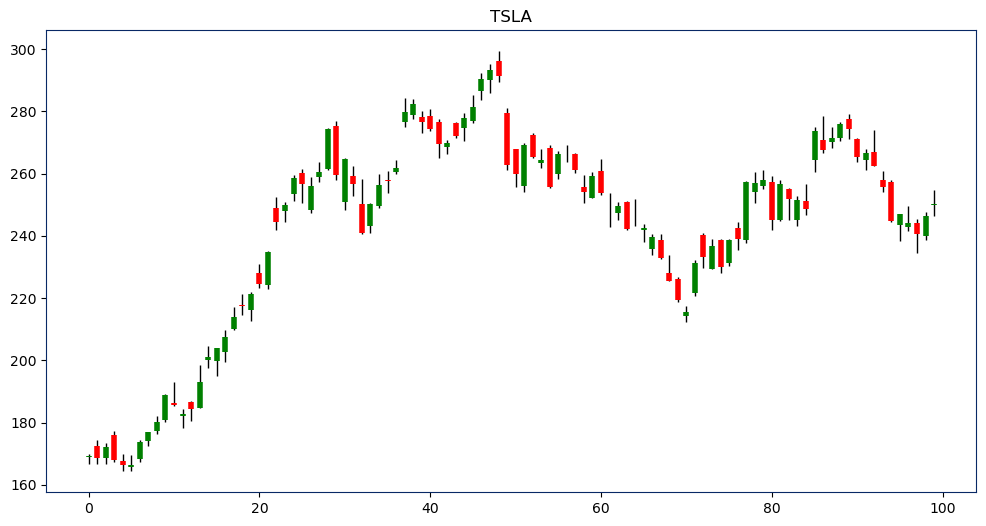

In [48]:
# Sofien Kaabar. 2023.
# Mastering Financial Pattern Recognition: Finding and Back-Testing Candlestick Patterns with Python 1st Edition

def ohlc_plot_candles(df, window, 
                      figsize=(12, 6), 
                      title='Candlestick Chart'):
    sample = df.iloc[-window:]
    plt.figure(figsize=figsize)
    plt.title(title)
    for i in range(len(sample)):
        # Plotting the wicks
        plt.vlines(x=i, 
                   ymin=sample.iloc[i]['Low'], 
                   ymax=sample.iloc[i]['High'], 
                   color='black', linewidth=1)
        # Plotting the candle's body (open to close)
        if sample.iloc[i]['Close'] > sample.iloc[i]['Open']:
            # Market rise (bullish)
            plt.vlines(x=i, ymin=sample.iloc[i]['Open'], 
                       ymax=sample.iloc[i]['Close'], 
                       color='green', linewidth=4)
        elif sample.iloc[i]['Close'] < sample.iloc[i]['Open']:
            # Market fall (bearish)
            plt.vlines(x=i, ymin=sample.iloc[i]['Close'], 
                       ymax=sample.iloc[i]['Open'], 
                       color='red', linewidth=4)
        else:
            # No price movement (doji)
            plt.vlines(x=i, ymin=sample.iloc[i]['Close'], 
                       ymax=sample.iloc[i]['Open'] + 0.00003, 
                       color='black', linewidth=4)
    plt.grid()
    plt.show()

###########################################
ohlc_plot_candles(asset, 100, title='TSLA')


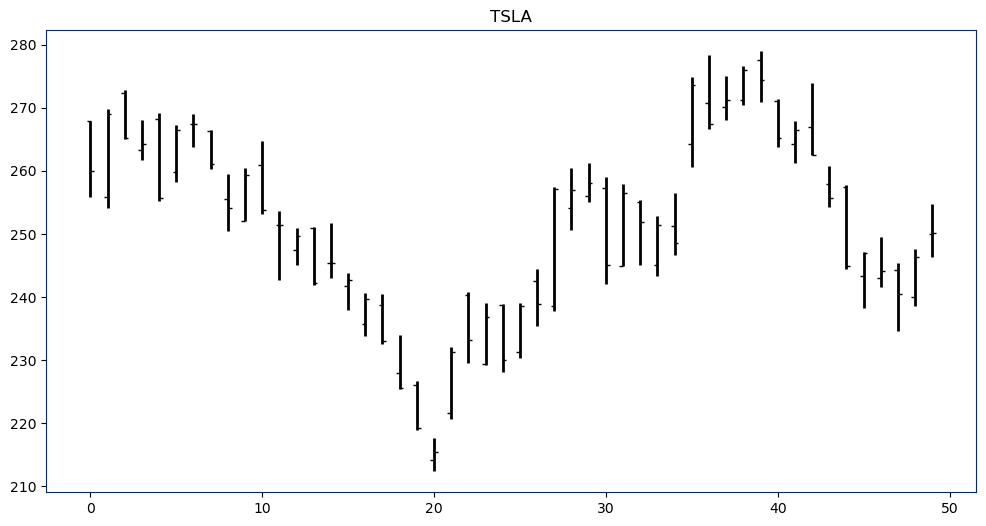

In [49]:
def ohlc_plot_bars(df, window, 
                   figsize=(12, 6), 
                   d=0.2, 
                   title='Bar Chart'):
    sample = df.iloc[-window:]
    plt.figure(figsize=figsize)
    plt.title(title)
    for i in range(len(sample)):
        # Plotting the high and low bar
        plt.vlines(x=i, ymin=sample.iloc[i]['Low'], 
                   ymax=sample.iloc[i]['High'], 
                   color='black', linewidth=2)

        # Open (left) tick
        plt.plot(i-d, sample.iloc[i]['Open'], 'k_', markersize=3)

        # Close (right) tick
        plt.plot(i+d, sample.iloc[i]['Close'], 'k_', markersize=3)

    plt.grid()
    plt.show()

###################################################
ohlc_plot_bars(asset, 5*10, d=0.02*5, title=ticker)

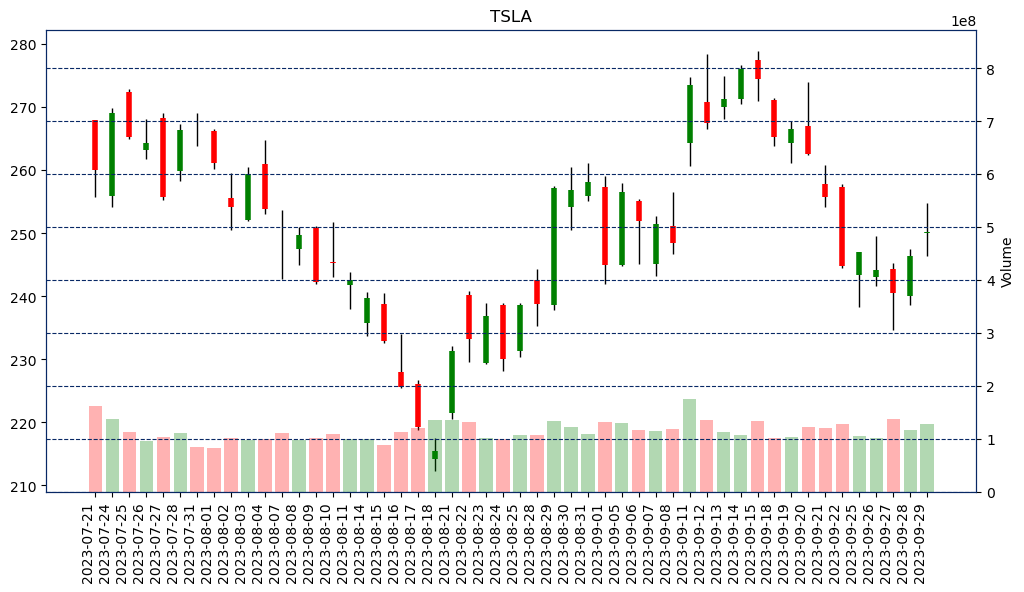

In [52]:
def ohlc_plot_candles_volumes(df, window, 
                              figsize=(12, 6), 
                              title='Candlestick Chart with Volumes'):
    sample = df.iloc[-window:]
    fig, ax1 = plt.subplots(figsize=figsize)
    # Create a second y-axis to plot the volume
    ax2 = ax1.twinx()  
    # Define the maximum volume to scale the y-axis of volume bars
    max_vol = sample['Volume'].max()
    for i in range(len(sample)):
        # Plotting the Candlechart
        ax1.vlines(x=i, ymin=sample.iloc[i]['Low'], 
                   ymax=sample.iloc[i]['High'], 
                   color='black', linewidth=1)
        if sample.iloc[i]['Close'] > sample.iloc[i]['Open']:
            ax1.vlines(x=i, ymin=sample.iloc[i]['Open'], 
                       ymax=sample.iloc[i]['Close'], 
                       color='green', linewidth=4)
        elif sample.iloc[i]['Close'] < sample.iloc[i]['Open']:
            ax1.vlines(x=i, ymin=sample.iloc[i]['Close'], 
                       ymax=sample.iloc[i]['Open'], 
                       color='red', linewidth=4)
        else:
            ax1.vlines(x=i, ymin=sample.iloc[i]['Close'], 
                       ymax=sample.iloc[i]['Open'] + 0.00003, 
                       color='black', linewidth=4)
        # Plotting the Volume bars
        color = ('green' if sample.iloc[i]['Close'] > 
                 sample.iloc[i]['Open'] else 'red')
        ax2.bar(i, sample.iloc[i]['Volume'], 
                color=color, alpha=0.3)
    # Adjust the y limit of the second axis to fit the volume bars
    ax2.set_ylim(0, max_vol*5)
    ax2.set_ylabel("Volume")
    # Setting x-axis labels to the dates from the DataFrame's index
    ax1.set_xticks(range(len(sample)))
    ax1.set_xticklabels([date.strftime('%Y-%m-%d') 
                         for date in sample.index], 
                         rotation=90, ha='right')
    ax1.grid()
    ax1.set_title(title)
    plt.show()
#################################################
ohlc_plot_candles_volumes(asset, 50, title=ticker)

### mlpfinance library tools

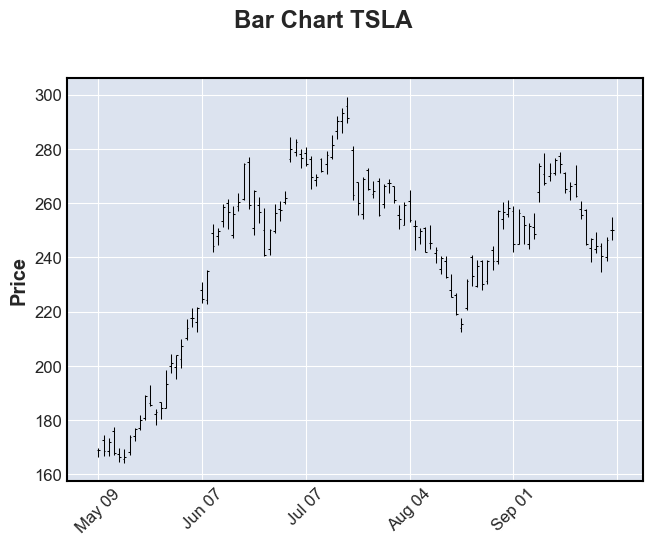

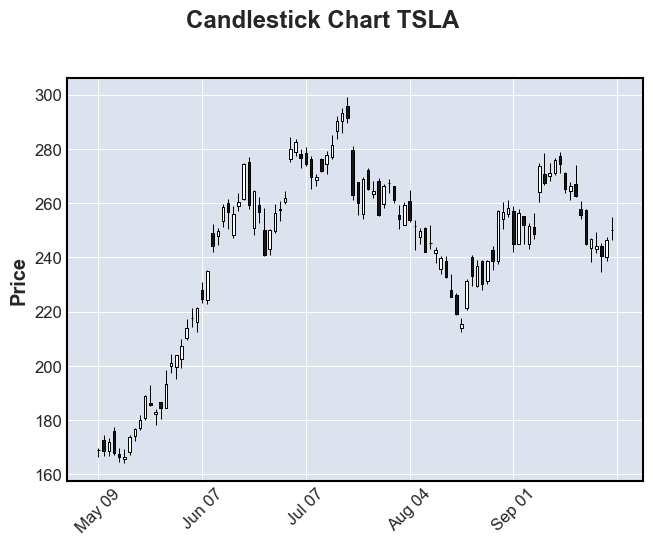

/opt/miniconda3/envs/PythonFinance/lib/python3.9/site-packages/mplfinance/_utils.py:129: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  high = highs[i]
/opt/miniconda3/envs/PythonFinance/lib/python3.9/site-packages/mplfinance/_utils.py:130: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  low = lows[i]
/opt/miniconda3/envs/PythonFinance/lib/python3.9/site-packages/mplfinance/_utils.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c

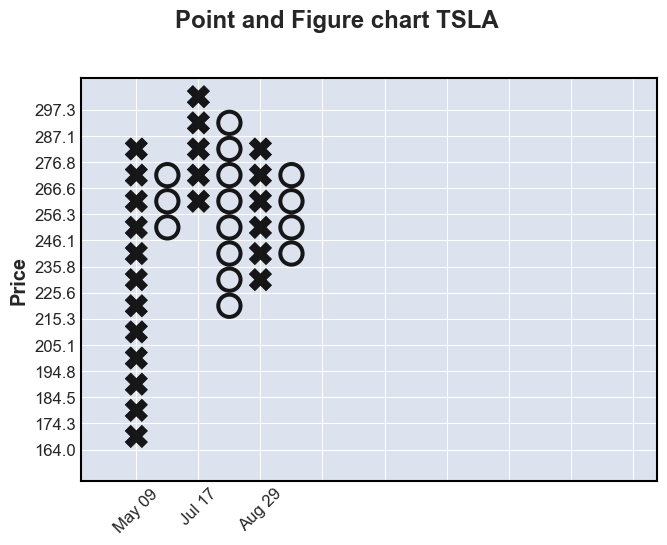

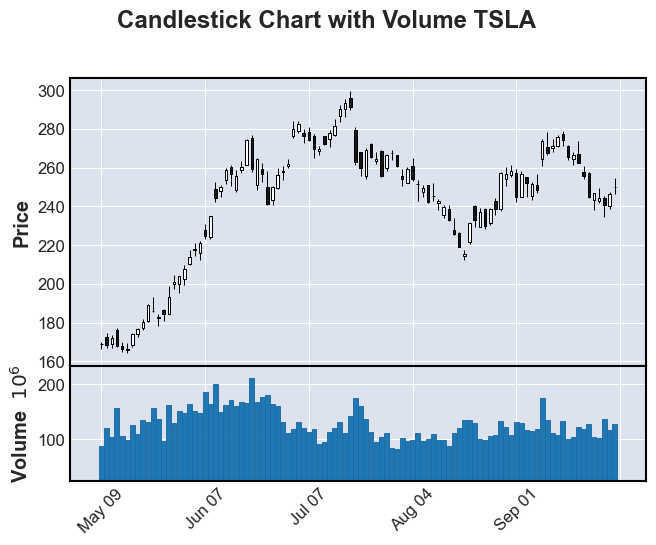

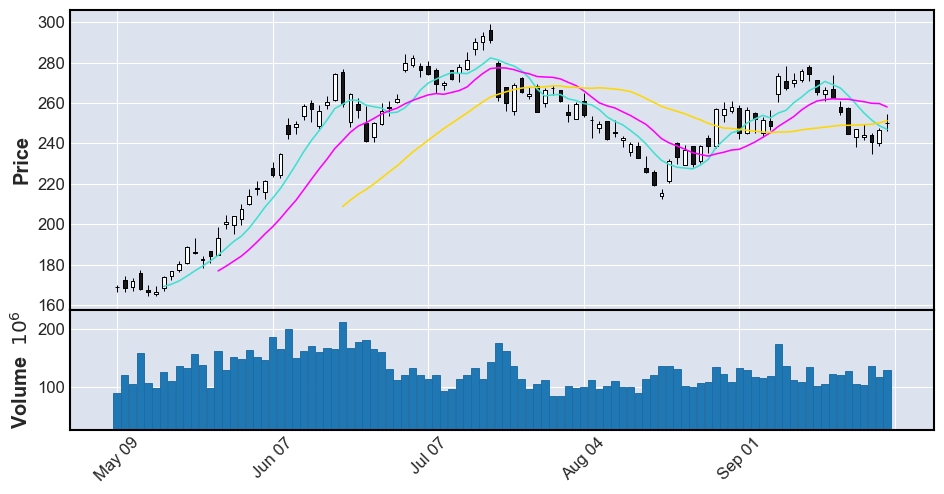

In [35]:
# https://github.com/matplotlib/mplfinance
# The default plot type, as you can see above, is 'ohlc'.
# Other plot types can be specified with the keyword argument type, for example,
# type='candle', type='line', type='renko', or type='pnf'

df = asset.iloc[-100:,1:]

# Plotting bar chart
mpf.plot(df, title='Bar Chart '+ticker, volume=False)

# Plotting candlestick chart
mpf.plot(df, type='candle', title='Candlestick Chart '+ticker, volume=False)

# Plotting Point and Figure chart (PnF)
mpf.plot(df ,type='pnf', title='Point and Figure chart '+ticker)

# Plotting candlestick chart with volume
mpf.plot(df, type='candle', title='Candlestick Chart with Volume '+ticker, volume=True)

mpf.plot(df, type='candle', mav=(7, 14, 30), volume=True, figsize=(12, 6))

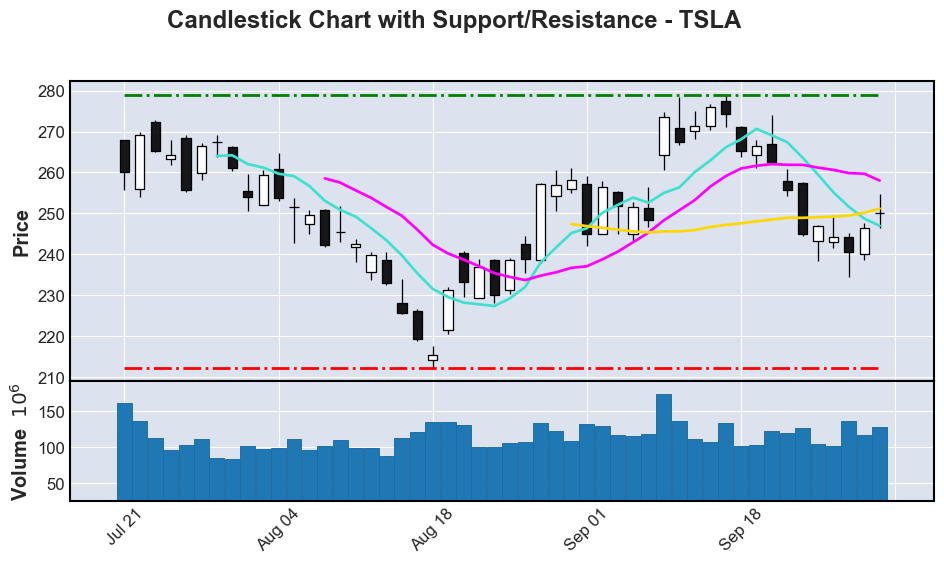

In [36]:
import mplfinance as mpf
df = asset.iloc[-50:, 1:]
# Rolling high/low for potential resistance/support
rolling_max = df['High'].rolling(window=20, 
                                 min_periods=1).max()
rolling_min = df['Low'].rolling(window=20, 
                                min_periods=1).min()
# Highest and lowest prices as resistance/support
potential_resistance = np.max(rolling_max)
potential_support = np.min(rolling_min)
# Horizontal lines for resistance and support levels
resistance_line = [potential_resistance] * len(df.index)
support_line = [potential_support] * len(df.index)
# Addplot for support and resistance lines
apdict = [mpf.make_addplot(resistance_line, color='g', 
                           linestyle='dashdot', width=2),
          mpf.make_addplot(support_line, color='r', 
                           linestyle='dashdot', width=2)]
# Plot with Moving Averages, volume, support, and resistance
mpf.plot(df, type='candle', mav=(7, 14, 30), volume=True, 
         figsize=(12, 6), addplot=apdict, 
         title='Candlestick Chart - ' + ticker)
# Display the plot
plt.show()

### Graphical analysis patterns

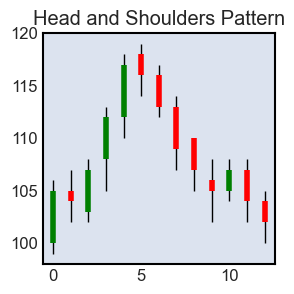

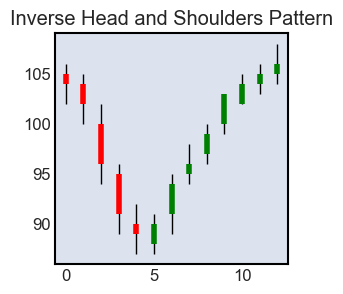

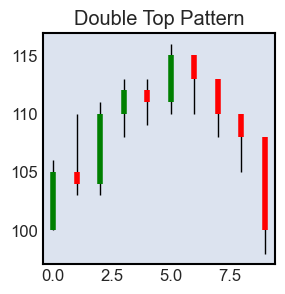

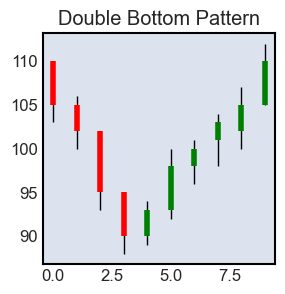

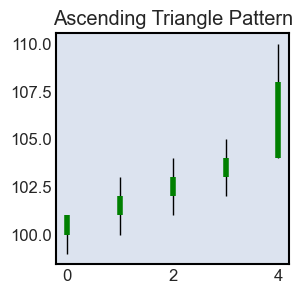

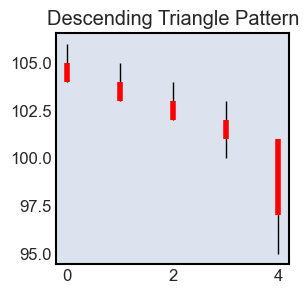

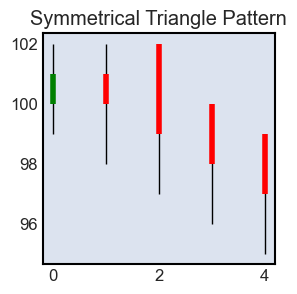

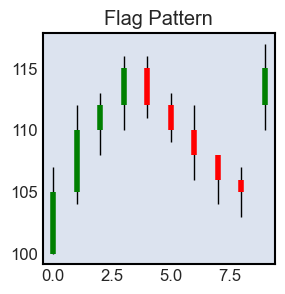

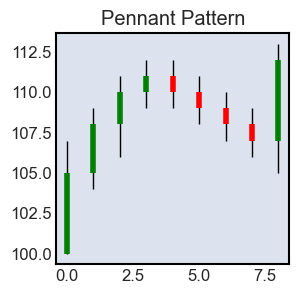

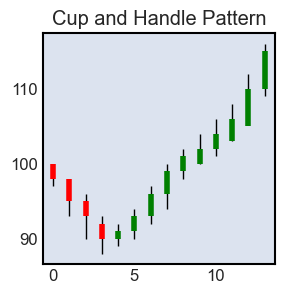

In [37]:
def plot_pattern(df, title):
  ohlc_plot_candles(df,
                    len(df['Close']),
                    figsize=(3,3),
                    title=title)

# Head and Shoulders pattern:
data_hs = {
    'Open': [100, 105, 103, 108, 112, 118, 116, 113, 110, 106, 105, 107, 104],
    'Close': [105, 104, 107, 112, 117, 116, 113, 109, 107, 105, 107, 104, 102],
    'High': [106, 107, 108, 113, 118, 119, 117, 114, 110, 108, 108, 108, 105],
    'Low': [99, 102, 102, 105, 110, 114, 112, 107, 105, 102, 104, 102, 100]
}
df = pd.DataFrame(data_hs)
plot_pattern(df, title="Head and Shoulders Pattern")

# Inverse Head and Shoulders pattern:
data_ihs = {
    'Open': [105, 104, 100, 95, 90, 88, 91, 95, 97, 100, 102, 104, 105],
    'Close': [104, 102, 96, 91, 89, 90, 94, 96, 99, 103, 104, 105, 106],
    'High': [106, 105, 102, 96, 92, 91, 95, 98, 100, 103, 105, 106, 108],
    'Low': [102, 100, 94, 89, 87, 87, 89, 94, 96, 99, 102, 103, 104]
}
df = pd.DataFrame(data_ihs)
plot_pattern(df, title="Inverse Head and Shoulders Pattern")

# Double Top and Double Bottom patterns:
data_double_top = {
    'Open': [100, 105, 104, 110, 112, 111, 115, 113, 110, 108],
    'Close': [105, 104, 110, 112, 111, 115, 113, 110, 108, 100],
    'High': [106, 110, 111, 113, 113, 116, 115, 112, 110, 108],
    'Low': [100, 103, 103, 108, 109, 110, 110, 108, 105, 98]
}
df = pd.DataFrame(data_double_top)
plot_pattern(df, title="Double Top Pattern")

data_double_bottom = {
    'Open': [110, 105, 102, 95, 90, 93, 98, 101, 102, 105],
    'Close': [105, 102, 95, 90, 93, 98, 100, 103, 105, 110],
    'High': [108, 106, 100, 95, 94, 100, 101, 104, 107, 112],
    'Low': [103, 100, 93, 88, 89, 92, 96, 98, 100, 105]
}
df = pd.DataFrame(data_double_bottom)
plot_pattern(df, title="Double Bottom Pattern")

# Triangle patterns:
data_ascending_triangle = {
    'Open': [100, 101, 102, 103, 104],
    'Close': [101, 102, 103, 104, 108],
    'High': [101, 103, 104, 105, 110],
    'Low': [99, 100, 101, 102, 104]
}
df = pd.DataFrame(data_ascending_triangle)
plot_pattern(df, title="Ascending Triangle Pattern")

data_descending_triangle = {
    'Open': [105, 104, 103, 102, 101],
    'Close': [104, 103, 102, 101, 97],
    'High': [106, 105, 104, 103, 101],
    'Low': [104, 103, 102, 100, 95]
}
df = pd.DataFrame(data_descending_triangle)
plot_pattern(df, title="Descending Triangle Pattern")

data_symmetrical_triangle = {
    'Open': [100, 101, 102, 100, 99],
    'Close': [101, 100, 99, 98, 97],
    'High': [102, 102, 101, 100, 99],
    'Low': [99, 98, 97, 96, 95]
}
df = pd.DataFrame(data_symmetrical_triangle)
plot_pattern(df, title="Symmetrical Triangle Pattern")

# Flags and Pennants patterns:
data_flag = {
    'Open': [100, 105, 110, 112, 115, 112, 110, 108, 106, 112],
    'Close': [105, 110, 112, 115, 112, 110, 108, 106, 105, 115],
    'High': [107, 112, 113, 116, 116, 113, 112, 108, 107, 117],
    'Low': [100, 104, 108, 110, 111, 109, 106, 104, 103, 110]
}
df = pd.DataFrame(data_flag)
plot_pattern(df, title="Flag Pattern")

data_pennant = {
    'Open': [100, 105, 108, 110, 111, 110, 109, 108, 107],
    'Close': [105, 108, 110, 111, 110, 109, 108, 107, 112],
    'High': [107, 109, 111, 112, 112, 111, 110, 109, 113],
    'Low': [100, 104, 106, 109, 109, 108, 107, 106, 105]
}
df = pd.DataFrame(data_pennant)
plot_pattern(df, title="Pennant Pattern")

# Cup and Handle pattern:
data_cup_and_handle = {
    'Open': [100, 98, 95, 92, 90, 91, 93, 96, 99, 100, 102, 103, 105, 110],
    'Close': [98, 95, 93, 90, 91, 93, 96, 99, 101, 102, 104, 106, 110, 115],
    'High': [99, 97, 96, 93, 92, 94, 97, 100, 102, 104, 106, 108, 112, 116],
    'Low': [97, 93, 90, 88, 89, 90, 92, 94, 98, 100, 101, 103, 107, 109]
}
df = pd.DataFrame(data_cup_and_handle)
plot_pattern(df, title="Cup and Handle Pattern")


## Techniques Analysis with Python

### Simple Bollinger Bands, MACD, and RSI plots

In [53]:
def plot_bollinger_bands(data, column, n=20, k=2):
    data['SMA'] = data[column].rolling(window=n).mean()
    data['Upper'] = data['SMA'] + k * data[column].rolling(window=n).std()
    data['Lower'] = data['SMA'] - k * data[column].rolling(window=n).std()

    plt.figure(figsize=(10,5))
    data[[column, 'SMA', 'Upper', 'Lower']].plot(ax=plt.gca())
    plt.title('Bollinger Bands')
    plt.show()


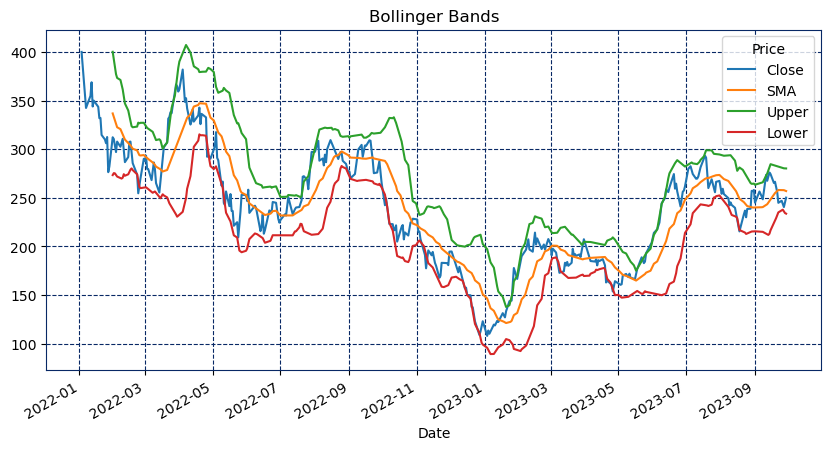

In [54]:
plot_bollinger_bands(asset, 'Close')

In [56]:
def plot_macd(data, column):
    data['12_EMA'] = data[column].ewm(span=12).mean()
    data['26_EMA'] = data[column].ewm(span=26).mean()
    data['MACD'] = data['12_EMA'] - data['26_EMA']
    data['Signal'] = data['MACD'].ewm(span=9).mean()

    plt.figure(figsize=(10,5))
    data[['MACD', 'Signal']].plot(ax=plt.gca())
    plt.title('MACD & Signal Line')
    plt.show()


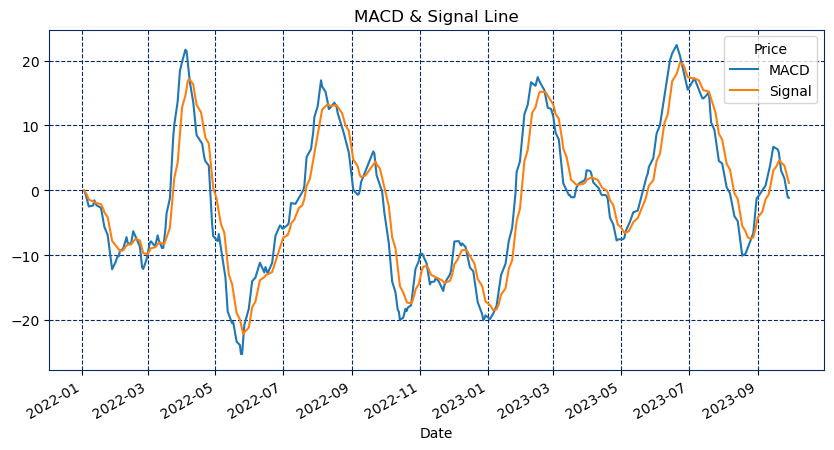

In [57]:
plot_macd(asset, 'Close')

In [58]:
def plot_rsi(data, column, n=14):
    delta = data[column].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    avg_gain = gain.rolling(window=n).mean()
    avg_loss = loss.rolling(window=n).mean()

    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    plt.figure(figsize=(10,5))
    data['RSI'].plot(ax=plt.gca())
    plt.title('RSI')
    plt.axhline(70, color='r', linestyle='--')
    plt.axhline(30, color='r', linestyle='--')
    plt.show()


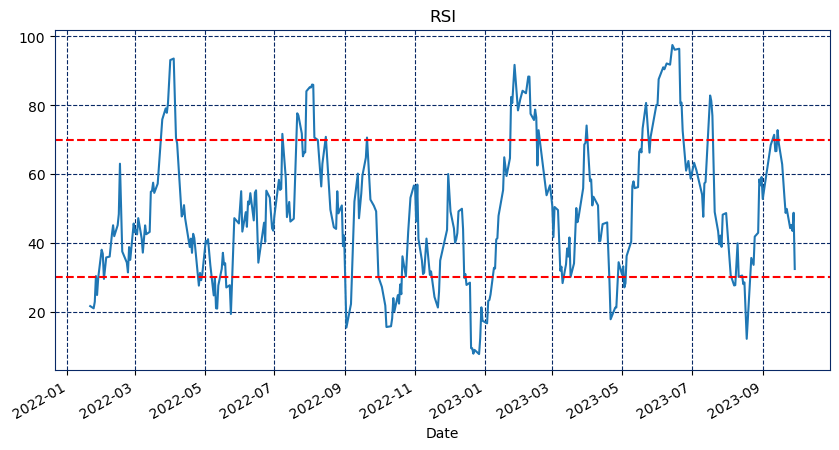

In [59]:
plot_rsi(asset, 'Close')

### Visualize Bollinger Bands, MACD, and RSI on a candlestick plot  

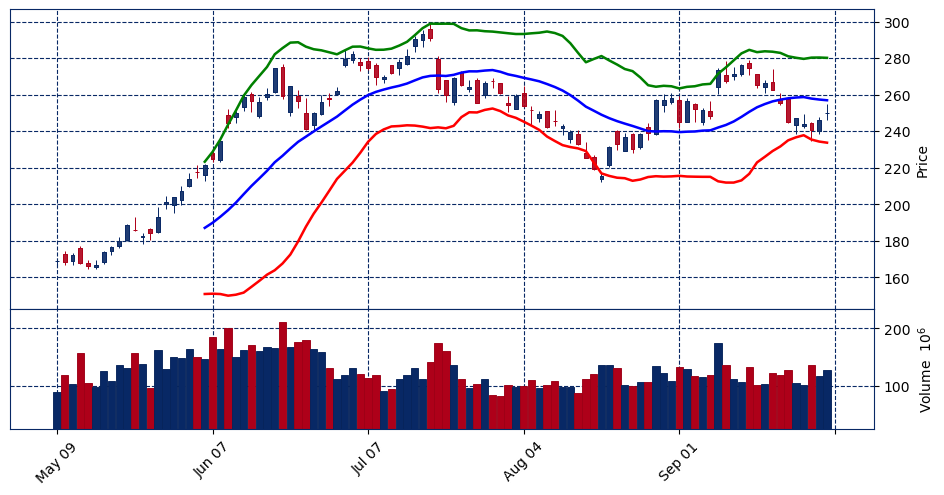

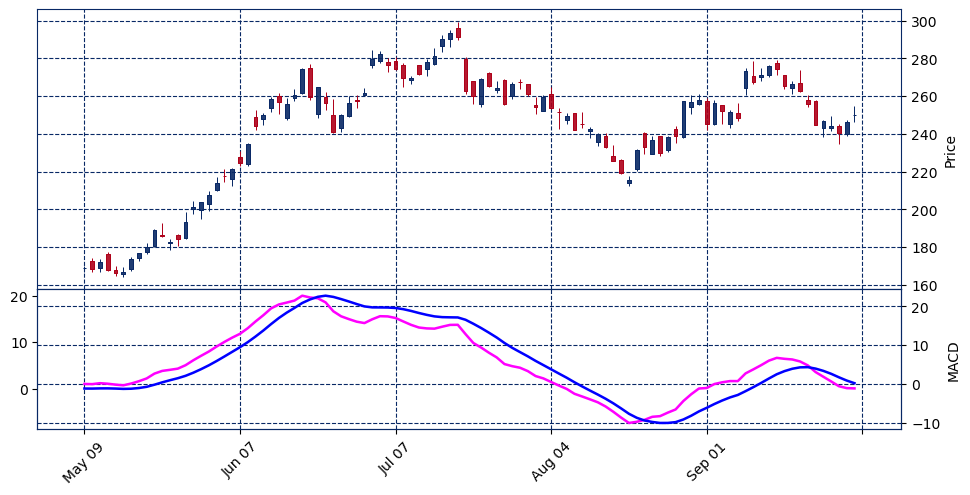

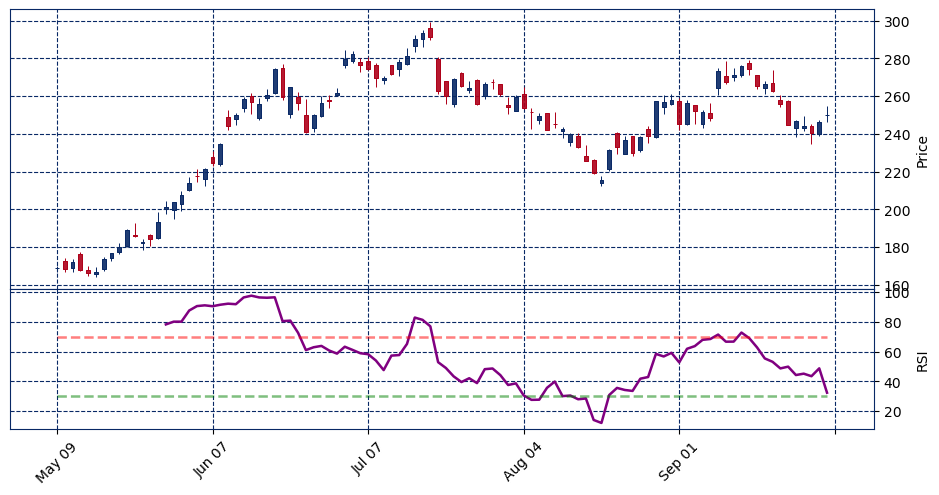

In [63]:
# Bollinger Bands plotting function
def plot_candlestick_with_bb(df, window=20, 
                             no_of_std=2):
    # Calculate Bollinger Bands
    rolling_mean = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * no_of_std)
    lower_band = rolling_mean - (rolling_std * no_of_std)
    # Add Bollinger Bands to the DataFrame
    df['Upper Band'] = upper_band
    df['Lower Band'] = lower_band
    df['Middle Band'] = rolling_mean  
    # Plot configuration
    apds = [mpf.make_addplot(df['Upper Band'].values, 
                             color='green'),
            mpf.make_addplot(df['Middle Band'].values,
                             color='blue'),  # MVA line
            mpf.make_addplot(df['Lower Band'].values, 
                             color='red')]
    mpf.plot(df, type='candle', addplot=apds, volume=True,
             figsize=(12, 6), style='starsandstripes')
# MACD plotting function
def plot_candlestick_with_macd(df, span1=12, 
                               span2=26, 
                               signal_span=9):
    # Calculate MACD and Signal line
    exp1 = df['Close'].ewm(span=span1, 
                           adjust=False).mean()
    exp2 = df['Close'].ewm(span=span2, 
                           adjust=False).mean()
    macd_line = exp1 - exp2
    signal_line = macd_line.ewm(span=signal_span, 
                                adjust=False).mean()
    # Plot configuration
    apds = [mpf.make_addplot(macd_line.values, 
                             panel=1, color='fuchsia', 
                             ylabel='MACD'),
            mpf.make_addplot(signal_line.values, 
                             panel=1, color='b')]
    # Plot
    mpf.plot(df, type='candle', addplot=apds, 
             volume=False, style='starsandstripes',
             panel_ratios=(6,3), figsize=(12, 6))
# RSI plotting function
def plot_candlestick_with_rsi(df, window=14):
    # Calculate RSI
    delta = df['Close'].diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    # Calculate the EMA of the UPs and DWONs
    roll_up = up.rolling(window=window).mean()
    roll_down = down.rolling(window=window).mean()
    # Calculate RS and RSI
    RS = roll_up / roll_down
    rsi_line = 100 - (100 / (1 + RS))
    # Create threshold lines
    overbought_line = [70] * len(df)
    oversold_line = [30] * len(df)
    # Plot configuration
    apds = [mpf.make_addplot(rsi_line.values, 
                             panel=1, 
                             color='purple', 
                             ylabel='RSI'),
            mpf.make_addplot(overbought_line, 
                             panel=1, 
                             color='red', 
                             alpha=0.5, 
                             linestyle='dashed'),
            mpf.make_addplot(oversold_line, 
                             panel=1, 
                             color='green', 
                             alpha=0.5, 
                             linestyle='dashed')]
    # Ploting
    mpf.plot(df, type='candle', 
             addplot=apds, volume=False,
             panel_ratios=(6,3), 
             figsize=(12, 6), 
             style='starsandstripes')
##############################
df = asset.iloc[-100:, 1:]
plot_candlestick_with_bb(df)
plot_candlestick_with_macd(df)
plot_candlestick_with_rsi(df)

### Calculate Bollinger Bands, MACD, and RSI indicator values

In [45]:
# https://github.com/minggnim/ta-lib
# TA-lib for technical analysis indicator calculatings
import talib

df1 = asset.iloc[-50:, 1:]

# Calculate Bollinger Bands
df1['upper_band'], df1['middle_band'], df1['lower_band'] = talib.BBANDS(
    df1['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

# Calculate MACD
df1['macd'], df1['macdsignal'], df1['macdhist'] = talib.MACD(
    df1['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Calculate RSI
df1['rsi'] = talib.RSI(df1['Close'], timeperiod=14)

# Display the head of the DataFrame to see the results
print(df1.tail())


Price            Close        High         Low        Open       Volume  \
Date                                                                      
2023-09-25  246.990005  247.100006  238.309998  243.380005  104636600.0   
2023-09-26  244.119995  249.550003  241.660004  242.979996  101993600.0   
2023-09-27  240.500000  245.330002  234.580002  244.259995  136597200.0   
2023-09-28  246.380005  247.550003  238.649994  240.020004  117058900.0   
2023-09-29  250.220001  254.770004  246.350006  250.000000  128346200.0   

Price              SMA       Upper       Lower      12_EMA      26_EMA  \
Date                                                                     
2023-09-25  258.455999  280.243250  236.668748  257.432966  255.587658   
2023-09-26  258.720998  279.613177  237.828820  255.384816  254.738201   
2023-09-27  257.886999  280.313552  235.460446  253.094844  253.683520   
2023-09-28  257.360999  280.370915  234.351083  252.061792  253.142518   
2023-09-29  256.968000  280.19

In [46]:
df2 = asset.iloc[-50:, 1:]

# Function to calculate Moving Average Convergence Divergence (MACD)
def calculate_macd(df, slow_period=26, fast_period=12, signal_period=9):
    exp1 = df['Close'].ewm(span=fast_period, adjust=False).mean()
    exp2 = df['Close'].ewm(span=slow_period, adjust=False).mean()
    macd = exp1 - exp2
    signal_line = macd.ewm(span=signal_period, adjust=False).mean()
    histogram = macd - signal_line
    return macd, signal_line, histogram

# Function to calculate Relative Strength Index (RSI)
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(df, period=20, num_of_std=2):
    rolling_mean = df['Close'].rolling(window=period).mean()
    rolling_std = df['Close'].rolling(window=period).std()
    upper_band = rolling_mean + (rolling_std * num_of_std)
    lower_band = rolling_mean - (rolling_std * num_of_std)
    return upper_band, rolling_mean, lower_band

# Apply functions to the DataFrame
df2['macd'], df2['signal_line'], df2['histogram'] = calculate_macd(df2)
df2['upper_band'], df2['middle_band'], df2['lower_band'] = calculate_bollinger_bands(df2)
df2['rsi'] = calculate_rsi(df2)

# Display the head of the DataFrame to see the results
print(df.tail())

Price            Close        High         Low        Open       Volume  \
Date                                                                      
2023-09-25  246.990005  247.100006  238.309998  243.380005  104636600.0   
2023-09-26  244.119995  249.550003  241.660004  242.979996  101993600.0   
2023-09-27  240.500000  245.330002  234.580002  244.259995  136597200.0   
2023-09-28  246.380005  247.550003  238.649994  240.020004  117058900.0   
2023-09-29  250.220001  254.770004  246.350006  250.000000  128346200.0   

Price              SMA       Upper       Lower      12_EMA      26_EMA  \
Date                                                                     
2023-09-25  258.455999  280.243250  236.668748  257.432966  255.587658   
2023-09-26  258.720998  279.613177  237.828820  255.384816  254.738201   
2023-09-27  257.886999  280.313552  235.460446  253.094844  253.683520   
2023-09-28  257.360999  280.370915  234.351083  252.061792  253.142518   
2023-09-29  256.968000  280.19

## &copy; Dr. Dmytro Zherlitsyn, 2023 <br>
## &copy; BPB Publications, 2023